# This script process the optimization1_quadtree results 

1. Compile the optimization1_quadtree with:
```
make bin/o1qtree
```
2. Run the benchmarking script
```
cd scripts
python3 run_par_optim1_qtree
```
3. The output that we will process is qtree_coffee.txt (renamed from qtree.out)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

experiment ={}

with open("qtree_coffee.txt") as f:
    for line in f:
        tokens = line.split()
        if "Running:" in tokens:
            name=tokens[2].split("/")[3]
            nth=int(tokens[6])
            if name not in experiment:
                experiment[name]={}
        if 'Quadtree' in tokens:
            experiment[name][nth]=[float(tokens[5])]
        if "STAGE" in tokens:
            experiment[name][nth].append(float(tokens[5]))
        if 'Average:' in tokens:
            experiment[name][nth].append(float(tokens[1]))

print(experiment)

results = {}

for i in experiment:
    results[i]={}
    for j in experiment[i]:
        results[i][j]={}
        results[i][j]['octree']=experiment[i][j][0]
        results[i][j]['stage1']=mean(experiment[i][j][1:15:3])
        results[i][j]['stage2']=mean(experiment[i][j][2:15:3])
        results[i][j]['stage3']=mean(experiment[i][j][3:15:3])
        results[i][j]['owm']=experiment[i][j][16]
#print(results)
for i in experiment:
    print("Cloud {} has Octree creation time = {:.2f}".format(i,mean(list(results[i][j]['octree'] for j in [1,2,4,6,8]))))


{'Alcoy': {1: [3.333789, 8.482939, 0.020704, 0.076818, 8.605], 2: [3.241473, 4.366197, 0.021172, 0.059048, 4.4706], 4: [3.126874, 2.194103, 0.020828, 0.050467, 2.2889], 6: [3.080083, 1.42154, 0.023001, 0.047846, 1.516], 8: [3.103318, 1.091413, 0.024348, 0.047342, 1.1862]}, 'Arzua': {1: [3.736092, 7.103217, 0.008718, 0.063925, 7.1861], 2: [3.666079, 3.707904, 0.009125, 0.04248, 3.7695], 4: [3.746879, 1.890192, 0.010219, 0.031216, 1.9411], 6: [3.762811, 1.317873, 0.011286, 0.029321, 1.3692], 8: [3.779105, 1.001441, 0.011523, 0.025751, 1.0483]}, 'BrionF': {1: [3.989843, 7.201183, 0.00296, 0.01255, 7.2197], 2: [4.085666, 3.496892, 0.002866, 0.010041, 3.5128], 4: [3.987275, 1.782138, 0.002943, 0.008865, 1.797], 6: [3.947344, 1.184721, 0.003351, 0.008393, 1.2002], 8: [3.971083, 1.066689, 0.003516, 0.007827, 1.0811]}, 'BrionU': {1: [4.359695, 8.367707, 0.003061, 0.019621, 8.3938], 2: [4.407687, 3.885048, 0.002967, 0.014371, 3.9055], 4: [4.458113, 2.012854, 0.003078, 0.011223, 2.0304], 6: [4.6

In [8]:
for i in experiment:
    print("Cloud {} has sequential OWM time = {:.2f}".format(i,results[i][1]['owm'] ))


Cloud Alcoy has sequential OWM time = 8.61
Cloud Arzua has sequential OWM time = 7.19
Cloud BrionF has sequential OWM time = 7.22
Cloud BrionU has sequential OWM time = 8.39


In [10]:
for i in experiment:
    print("Cloud {} has parallel OWM with 8 threads time(speedup) = {:.2f} ({:.1f}x)".format(i,results[i][8]['owm'],results[i][1]['owm']/results[i][8]['owm'] ))

Cloud Alcoy has parallel OWM with 8 threads time(speedup) = 1.19 (7.3x)
Cloud Arzua has parallel OWM with 8 threads time(speedup) = 1.05 (6.9x)
Cloud BrionF has parallel OWM with 8 threads time(speedup) = 1.08 (6.7x)
Cloud BrionU has parallel OWM with 8 threads time(speedup) = 1.16 (7.3x)


In [11]:
for i in experiment:
    for j in ['stage1','stage2','stage3']:
        print("Cloud {} stage {} time (percent) = {:.4f} ({:.2f}x)".format(i,j,results[i][1][j],results[i][1][j]/results[i][1]['owm']*100))


Cloud Alcoy stage stage1 time (percent) = 8.4829 (98.58x)
Cloud Alcoy stage stage2 time (percent) = 0.0207 (0.24x)
Cloud Alcoy stage stage3 time (percent) = 0.0768 (0.89x)
Cloud Arzua stage stage1 time (percent) = 7.1032 (98.85x)
Cloud Arzua stage stage2 time (percent) = 0.0087 (0.12x)
Cloud Arzua stage stage3 time (percent) = 0.0639 (0.89x)
Cloud BrionF stage stage1 time (percent) = 7.2012 (99.74x)
Cloud BrionF stage stage2 time (percent) = 0.0030 (0.04x)
Cloud BrionF stage stage3 time (percent) = 0.0126 (0.17x)
Cloud BrionU stage stage1 time (percent) = 8.3677 (99.69x)
Cloud BrionU stage stage2 time (percent) = 0.0031 (0.04x)
Cloud BrionU stage stage3 time (percent) = 0.0196 (0.23x)


# Spedup for each cloud

[1.         1.92479757 3.75944777 5.67612137 7.25425729]
[1.         1.90638016 3.70207614 5.24839322 6.85500334]
[1.         2.05525507 4.01764051 6.0154141  6.67810563]
[1.         2.14922545 4.13406225 5.56728792 7.25103663]


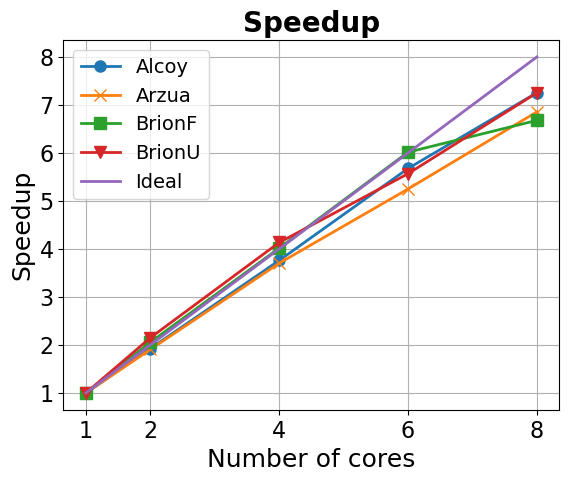

In [12]:
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

fig = plt.figure()

marks=['o-','x-','s-','v-','+-']

for (i,z) in zip(experiment,marks):
    print(np.array([results[i][1]['owm']/results[i][j]['owm'] for j in [1,2,4,6,8]]))
    plt.plot(np.array([1,2,4,6,8]), np.array([results[i][1]['owm']/results[i][j]['owm'] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
plt.plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=[i for i in experiment]
sizes.append('Ideal')
plt.title('Speedup',  fontweight='bold', fontsize=titlefs)
plt.legend(sizes,loc='best', fontsize= legendfs)
plt.ylabel('Speedup', fontsize=ylabelfs)
plt.xlabel('Number of cores', fontsize=xlabelfs)
plt.xticks([1,2,4,6,8],fontsize=xticksfs)
plt.yticks(fontsize=yticksfs)
plt.grid()

plt.show()

In [49]:
pp = PdfPages("Speedup-ompBaseline.pdf")
pp.savefig(fig)
pp.close()